In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv('tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [48]:
df.shape

(418, 12)

In [49]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Exploratory Data Analysis

Missing Data

In [51]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

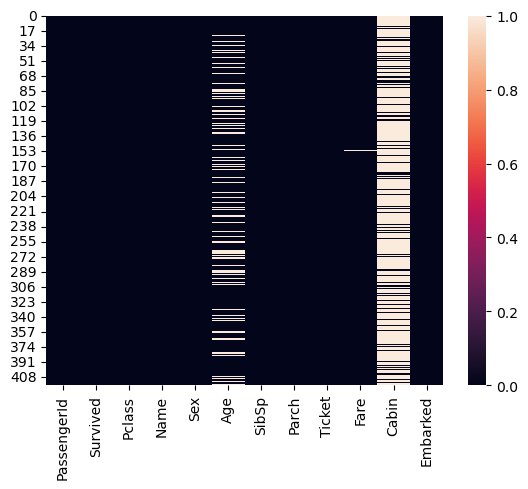

In [52]:
sns.heatmap(df.isnull());

In [53]:
df['Age'].replace(np.nan, df['Age'].mean(), inplace=True)
df['Fare'].replace(np.nan, df['Fare'].mean(), inplace=True)
df.drop('Cabin', axis=1,inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [54]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             80
SibSp            7
Parch            8
Ticket         363
Fare           170
Embarked         3
dtype: int64

In [55]:
# Let's make seperate list of categorical and numerical variables
cat_var = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
num_var = ['Age', 'Fare']

In [56]:
round(df['Survived'].value_counts(normalize=True)*100, 2)

0    63.64
1    36.36
Name: Survived, dtype: float64

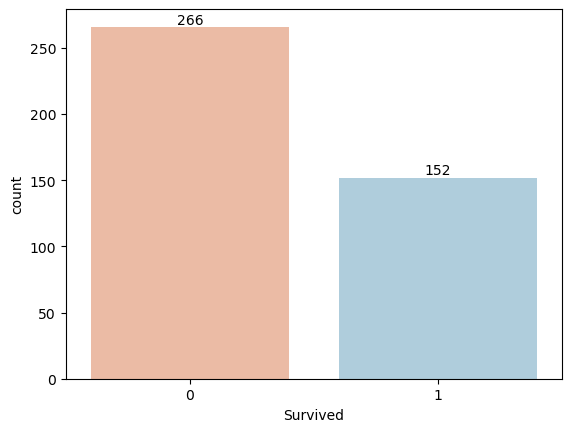

In [57]:
ax = sns.countplot(x=df['Survived'], palette='RdBu')
ax.bar_label(ax.containers[0])
plt.show()

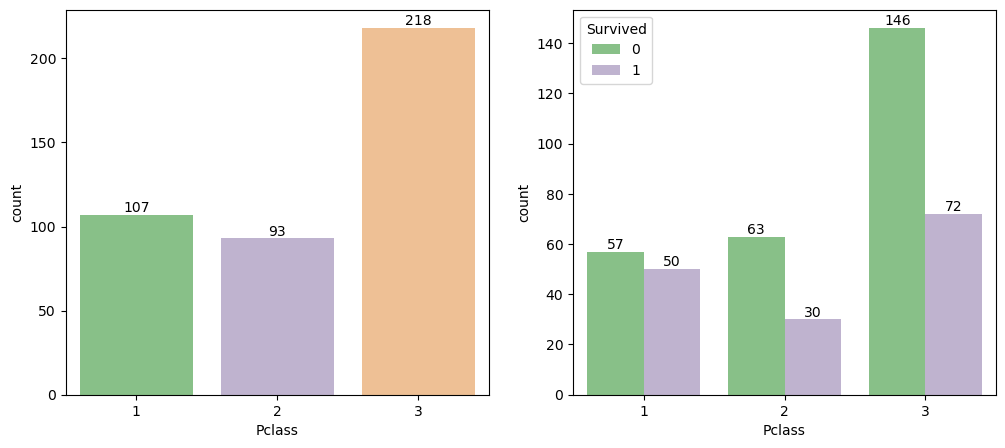

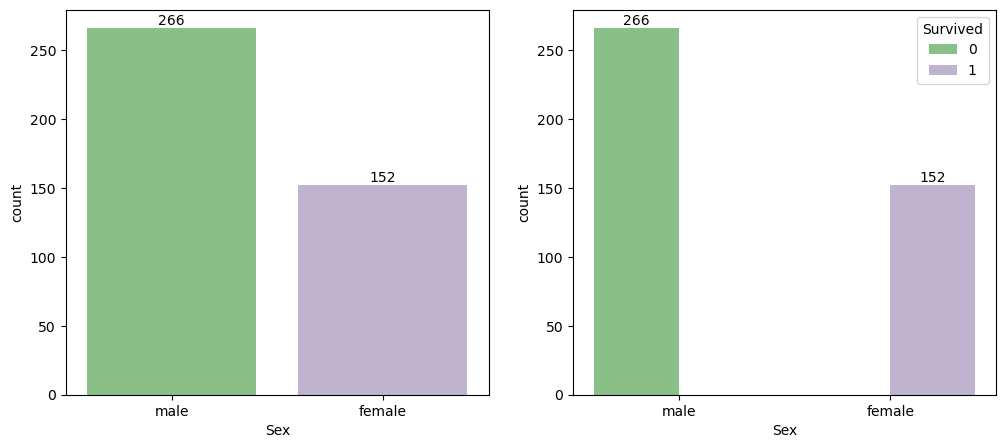

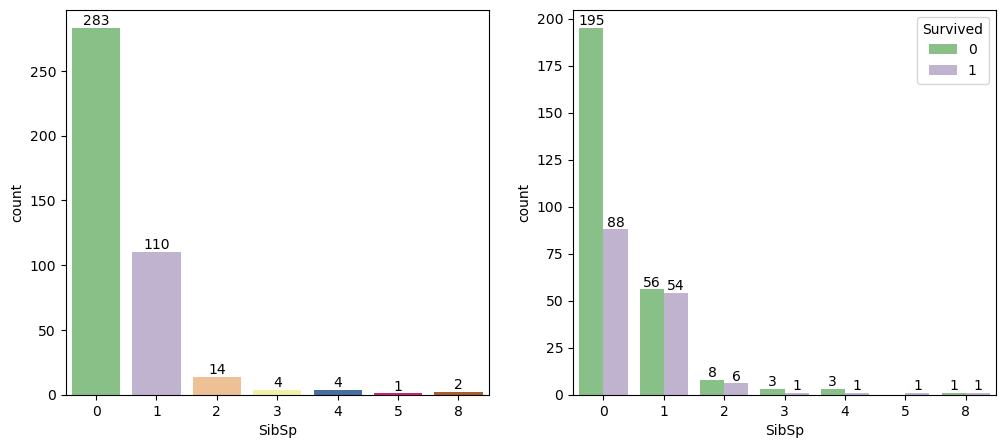

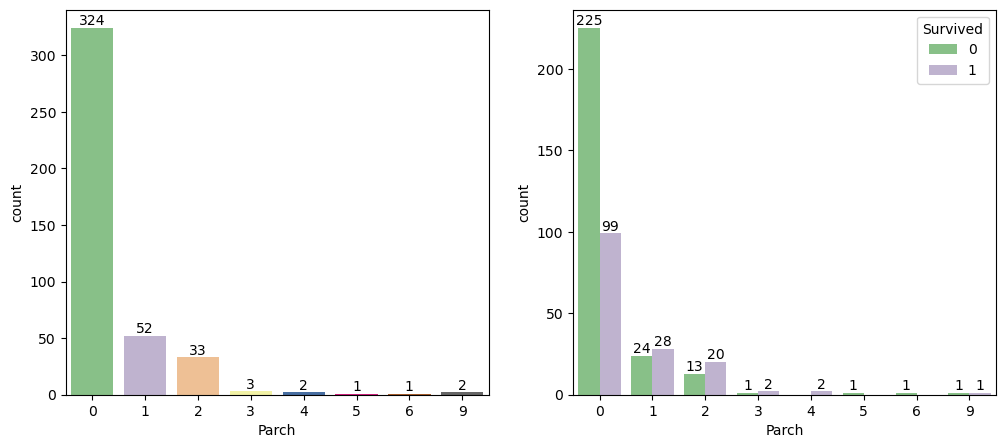

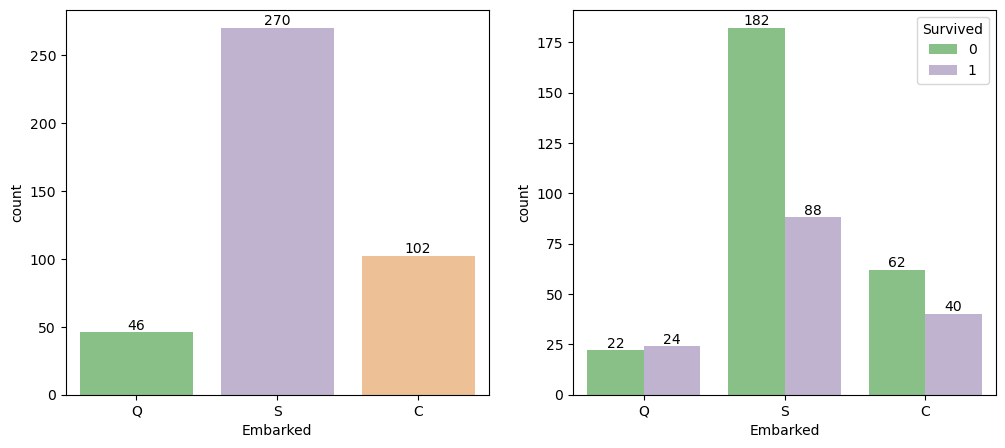

In [58]:
for column in cat_var:   
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    ax = sns.countplot(x=column, data=df, palette='Accent')
    ax.bar_label(ax.containers[0])

    plt.subplot(1,2,2)
    ax = sns.countplot(x=column, data=df, hue='Survived', palette='Accent')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.show()

In [59]:
df[num_var].describe()

,Age,Fare
count,418.000000,418.000000
mean,30.272590,35.627188
std,12.634534,55.840500
min,0.170000,0.000000
25%,23.000000,7.895800
50%,30.272590,14.454200
75%,35.750000,31.500000
max,76.000000,512.329200


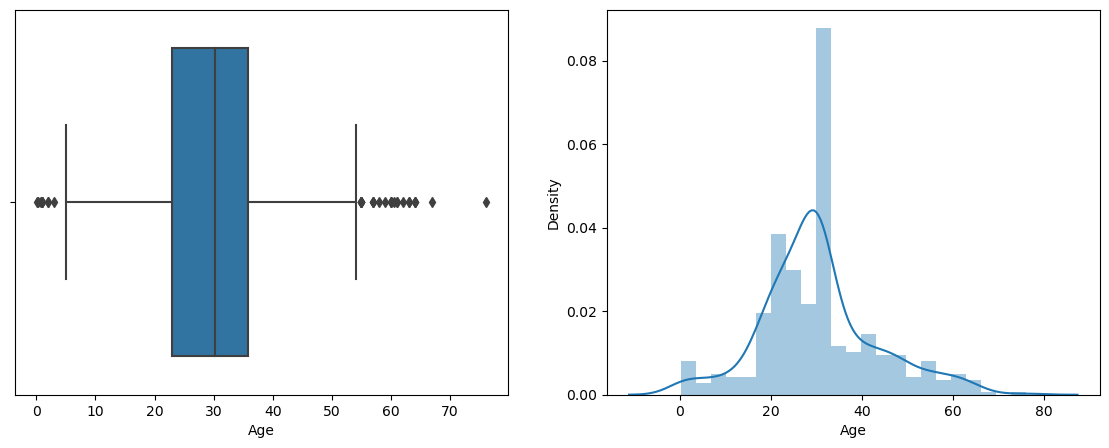

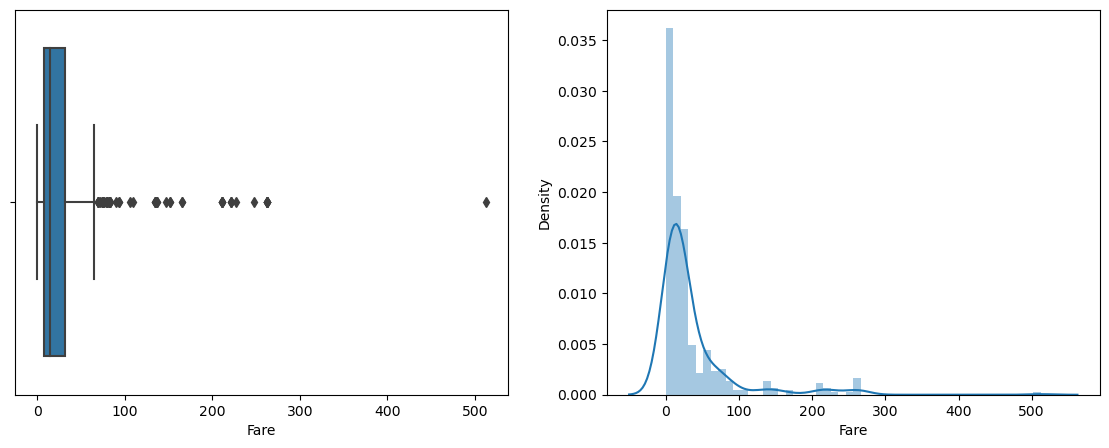

In [60]:
for column in num_var:
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    ax = sns.boxplot(df[column])

    plt.subplot(1,2,2)
    ax = sns.distplot(df[column])
    plt.show()

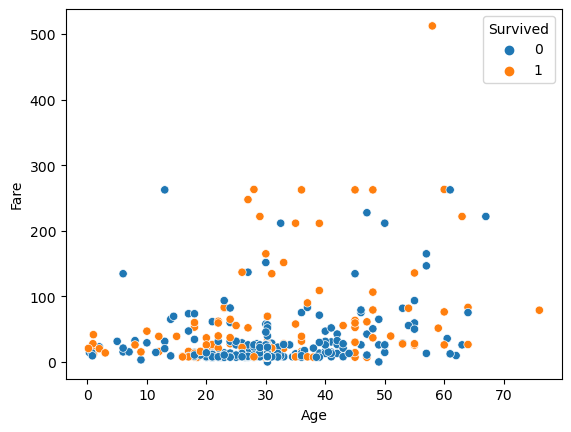

In [61]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.show()

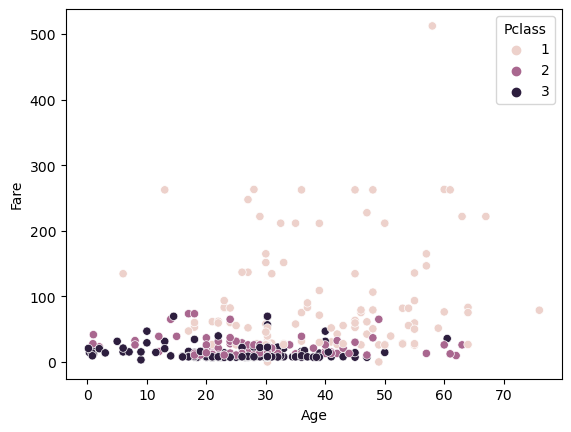

In [62]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Pclass')
plt.show()

In [63]:
df_update = df.drop(['PassengerId','Name', 'Ticket'], axis=1)
df_update.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [64]:
df_update['Sex'].replace({'male':1, 'female':0}, inplace=True)
df_update['Embarked'].replace({'Q':0, 'S':1, 'C':2}, inplace=True)
df_update.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,0
1,1,3,0,47.0,1,0,7.0000,1
2,0,2,1,62.0,0,0,9.6875,0
3,0,3,1,27.0,0,0,8.6625,1
4,1,3,0,22.0,1,1,12.2875,1


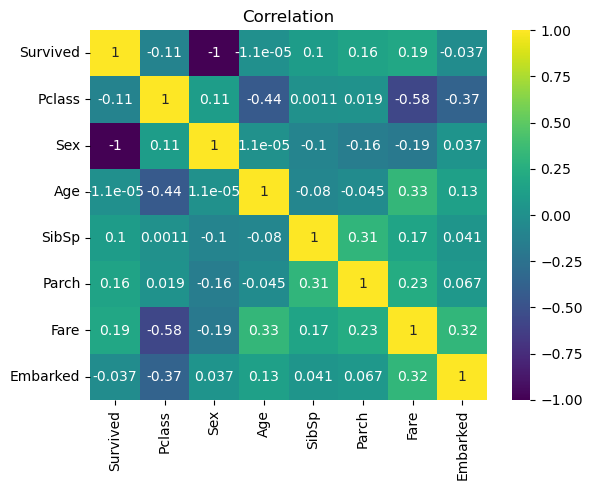

In [65]:
sns.heatmap(df_update.corr(), annot=True, cmap='viridis')
plt.title('Correlation')
plt.show()

# Construct and Evaluate Models

#Logistic regression model

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [67]:
X = df_update.drop('Survived', axis=1)
y = df_update['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,0
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,0
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [70]:
LR.coef_

array([[-1.74138080e-02, -6.13295988e+00,  1.67087222e-04,
         6.07114523e-02, -1.04619658e-02,  4.61803122e-03,
        -2.33448683e-01]])

In [71]:
LR.intercept_

array([2.84082039])

In [72]:
y_pred_train = LR.predict(X_train)

In [73]:
print('Accuracy: ', accuracy_score(y_train, y_pred_train))
print('Precision: ', precision_score(y_train, y_pred_train))
print('Recall: ', recall_score(y_train, y_pred_train))
print('F1 Score: ', f1_score(y_train, y_pred_train))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


In [74]:
y_pred_LR = LR.predict(X_test)

In [75]:
LR.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [76]:
print('Accuracy: ', accuracy_score(y_test, y_pred_LR))
print('Precision: ', precision_score(y_test, y_pred_LR))
print('Recall: ', recall_score(y_test, y_pred_LR))
print('F1 Score: ', f1_score(y_test, y_pred_LR))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


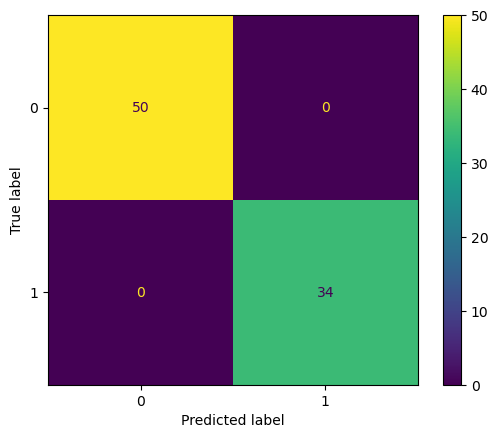

In [77]:
cm = confusion_matrix(y_test, y_pred_LR, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot();

**The logistic regression model has 100% accuracy. This model has correctly predicted all test samples.**


# K-Nearest Neighbour

In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [79]:
print('Accuracy: ', accuracy_score(y_test, y_pred_knn))
print('Precision: ', precision_score(y_test, y_pred_knn))
print('Recall: ', recall_score(y_test, y_pred_knn))
print('F1 Score: ', f1_score(y_test, y_pred_knn))

Accuracy:  0.6190476190476191
Precision:  0.5555555555555556
Recall:  0.29411764705882354
F1 Score:  0.3846153846153846


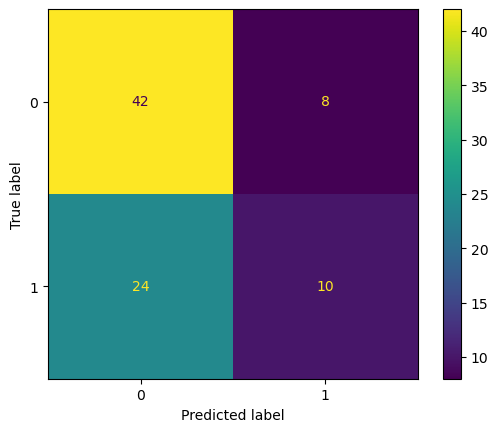

In [80]:
cm = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot();

**The K-Nearest Neighbour model has an accuracy of 61.9%. There are many false negative predictions in this model.**

# Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)

In [82]:
print('Accuracy: ', accuracy_score(y_test, y_pred_tree))
print('Precision: ', precision_score(y_test, y_pred_tree))
print('Recall: ', recall_score(y_test, y_pred_tree))
print('F1 Score: ', f1_score(y_test, y_pred_tree))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


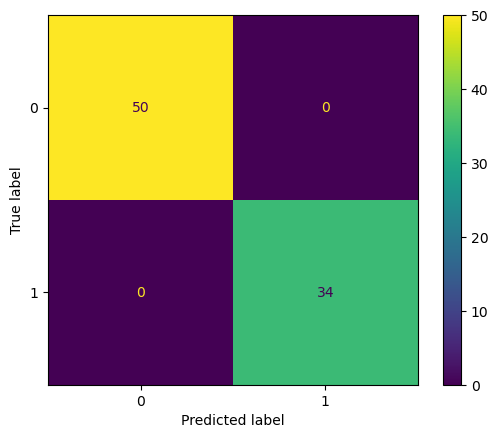

In [83]:
cm = confusion_matrix(y_test, y_pred_tree, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot();

**The Decision Tree model also has 100% accuracy and has correctly predicted all test samples.**

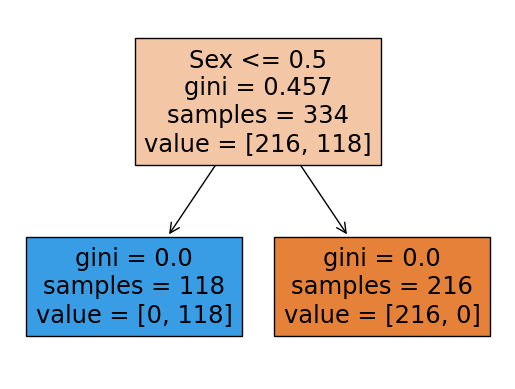

In [84]:
from sklearn.tree import plot_tree
plot_tree(tree, filled=True, feature_names=list(X.columns)) 
plt.show()